# *Import library and Read Data*

In [22]:
import pandas as pd
import numpy as np

# read and save data to variable
data = pd.read_csv('Data/dataset.csv')

# *Understanding Data information*

## *show first 5 data*

In [23]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## *show data size or dimension (row, column)*

In [24]:
data.shape

(500, 8)

## *show information of data*

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## *Show description of data*

In [26]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# *Data Visualization*

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

## *Visualization with pairplot*

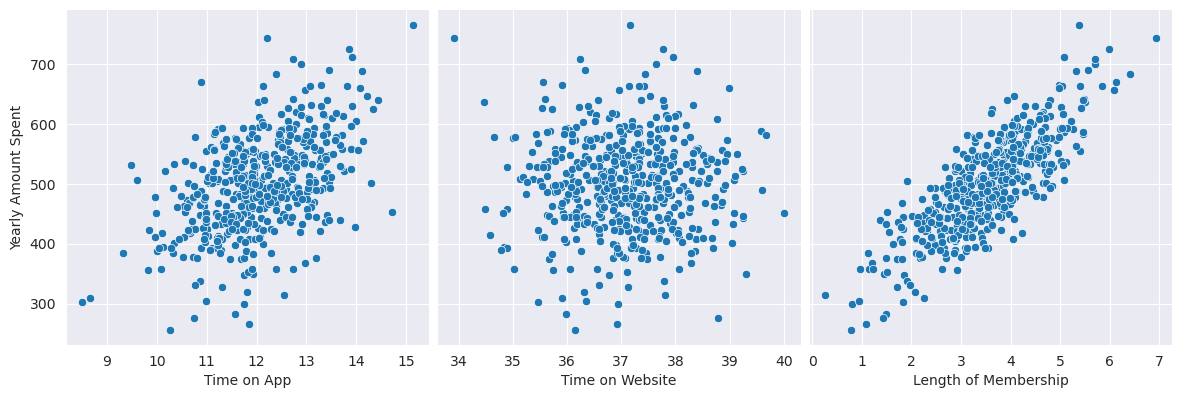

In [28]:
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'], y_vars='Yearly Amount Spent', height =4, aspect=1, kind='scatter')
plt.show()

# *Visualization with heatmap*

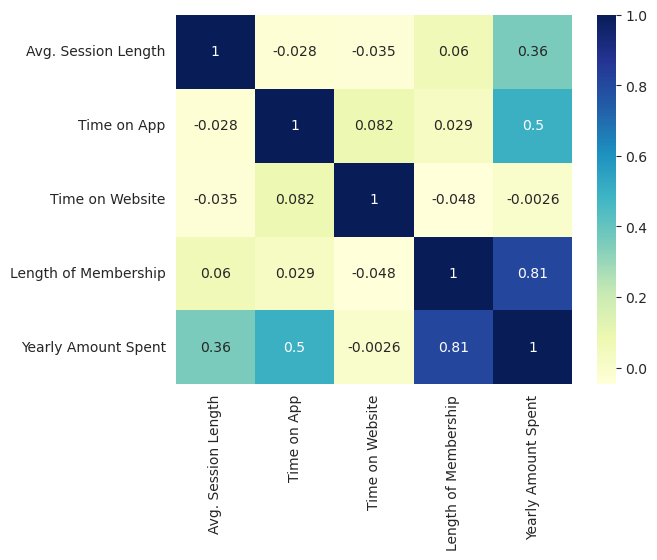

In [29]:
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu" ,annot=True)
plt.show()

# *Simple Linear Regression*

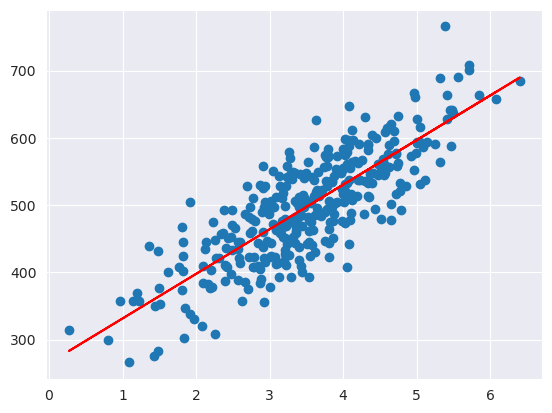

In [30]:
# simple linear regression always had one X
X = data['Length of Membership']
y = data['Yearly Amount Spent']

# split data to training and testing
# with proportion 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# training model with StatsModels library
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# Visualizing the regression line
# create scatter plot (ball that represent data)
plt.scatter(X_train, y_train)
# crate line plot (line that represent regression line)
plt.plot(X_train, lr.params['const'] + lr.params['Length of Membership']*X_train, 'r')
plt.show()

# *Residual analytical*

<Figure size 640x480 with 0 Axes>

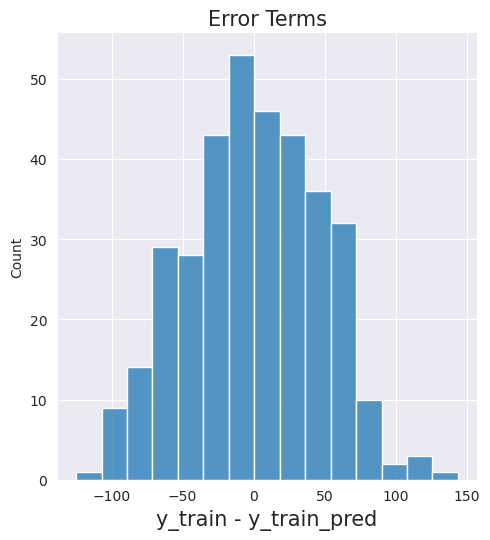

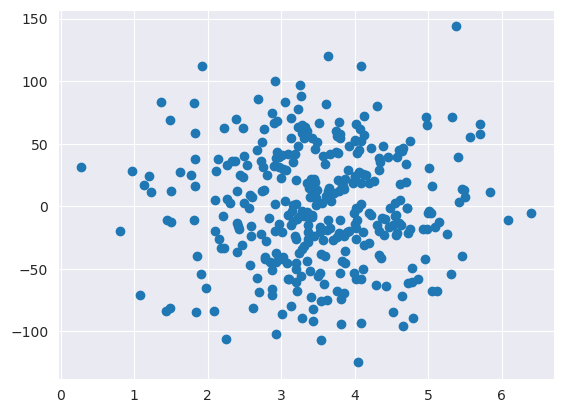

In [31]:
# prediction y value from X_train_sm that already trained
y_train_pred = lr.predict(X_train_sm)

# count residual(e) error from y_train reduced with y_train_pred
res = (y_train - y_train_pred)

# create histogram plot from residual error
fig = plt.figure()
sns.displot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# create scatter plot from residual error
plt.scatter(X_train,res)
plt.show()

# *Testing Data Prediction and Model Evaluation*

In [32]:
# prediction y value from X_test that already trained
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

# Testing Data prediction with R-Squared
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)

# show R-Squared
# value between 0 and 1, the closer to 1 the better the model
print('R-Squared :', r_squared)

R-Squared : 0.611948913768747


# *Testing Data visualization and prediction result*

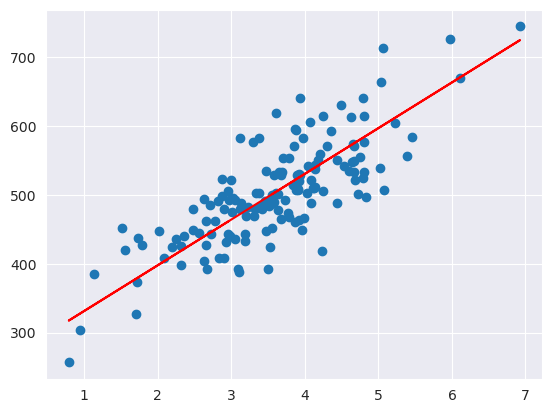

In [33]:
# create scatter plot (ball that represent data)
plt.scatter(X_test, y_test)
# crate line plot (line that represent regression line)
plt.plot(X_test, y_test_pred, 'r')
plt.show()